<a href="https://colab.research.google.com/github/pmantoine4/PA_D_24/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

This dataset contains information about advertising on a web site. It's goal is to predict whether a user will click on an advertisement or not. It is a
binary classification problem. Logistic Regression is used to solve this problem.

#Task 2a: Install the Needed Libraries

In [ ]:
# N/A

#Task 2b: Import the Needed Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly
import cufflinks as cf

#Task 3: Load the Data

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/advertising.csv')


#Task 4: Perform Data Exploratory Analysis (EDA)

In [ ]:
# To show and understand the data
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
# To show and understand the data
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


##Get Data Info

In [ ]:
# To obtain general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
# to obtain statistical information about the data
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Deepening the understandingof the data using visualizations

# A visualization of the entire data with Click on Ad in X axis


<ipython-input-30-edfd5452f093>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Clicked on Ad', ylabel='count'>

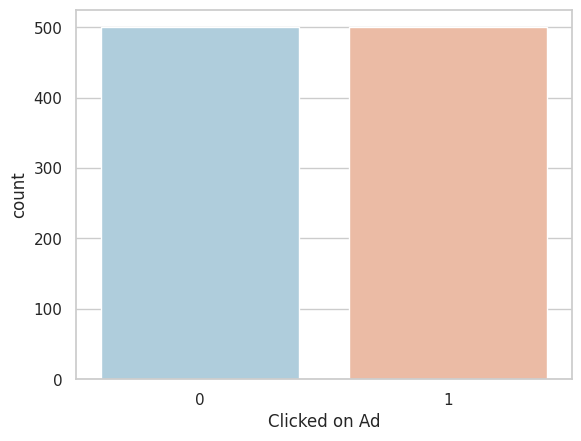

In [ ]:
# A visualization of the dataset with Click on Ad in the X. axis
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad', data=df, palette='RdBu_r')

Text(0.5, 0, 'Age')

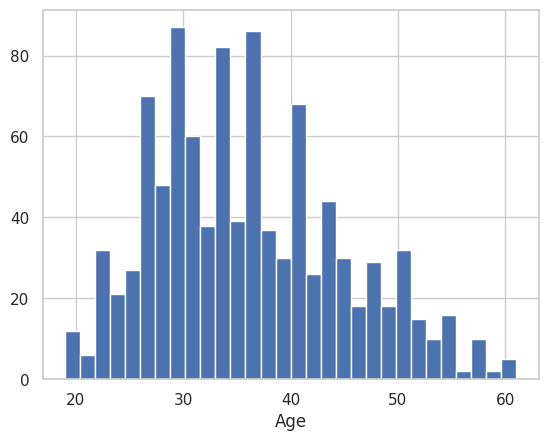

In [ ]:
# An histogram chart of the Age column
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')


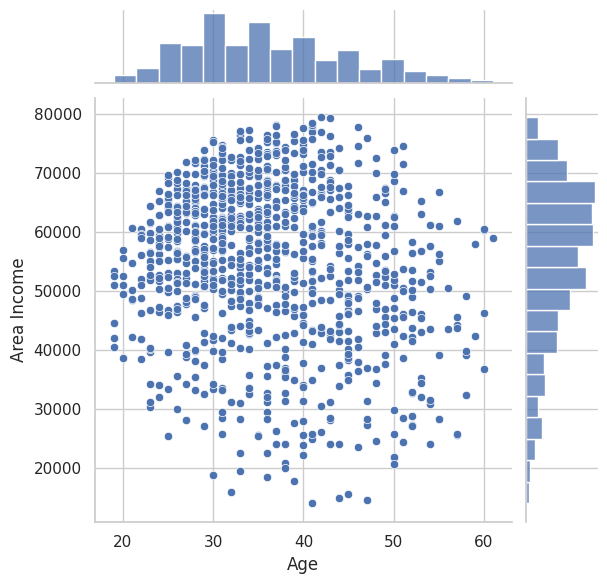

In [ ]:
# Visualization of Area Income VS Age
sns.jointplot(x='Age',y='Area Income',data=df)

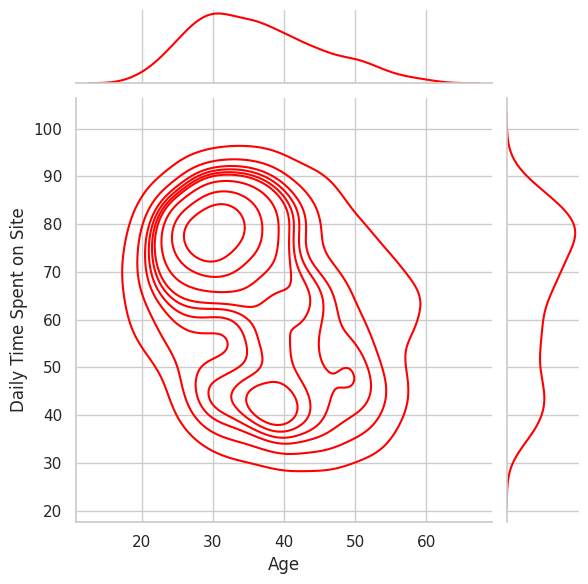

In [ ]:
# Visualization of Daily Time Spent on Site VS Age
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,color='red',kind='kde');

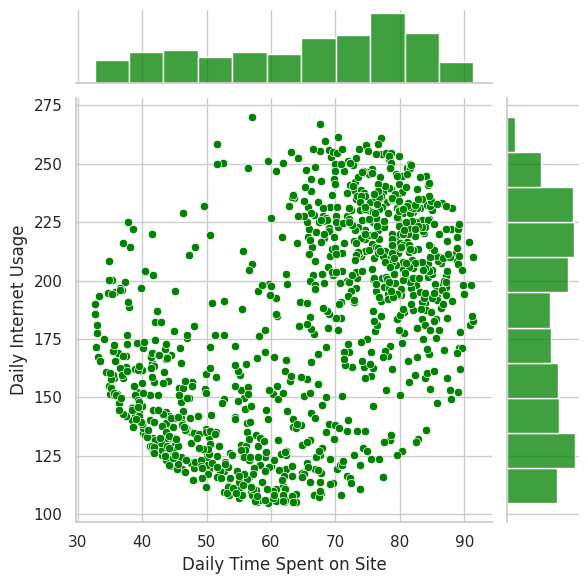

In [ ]:
# Visualization of Daily Internet Usage VS Daily Time Spent on Site
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,color='green');

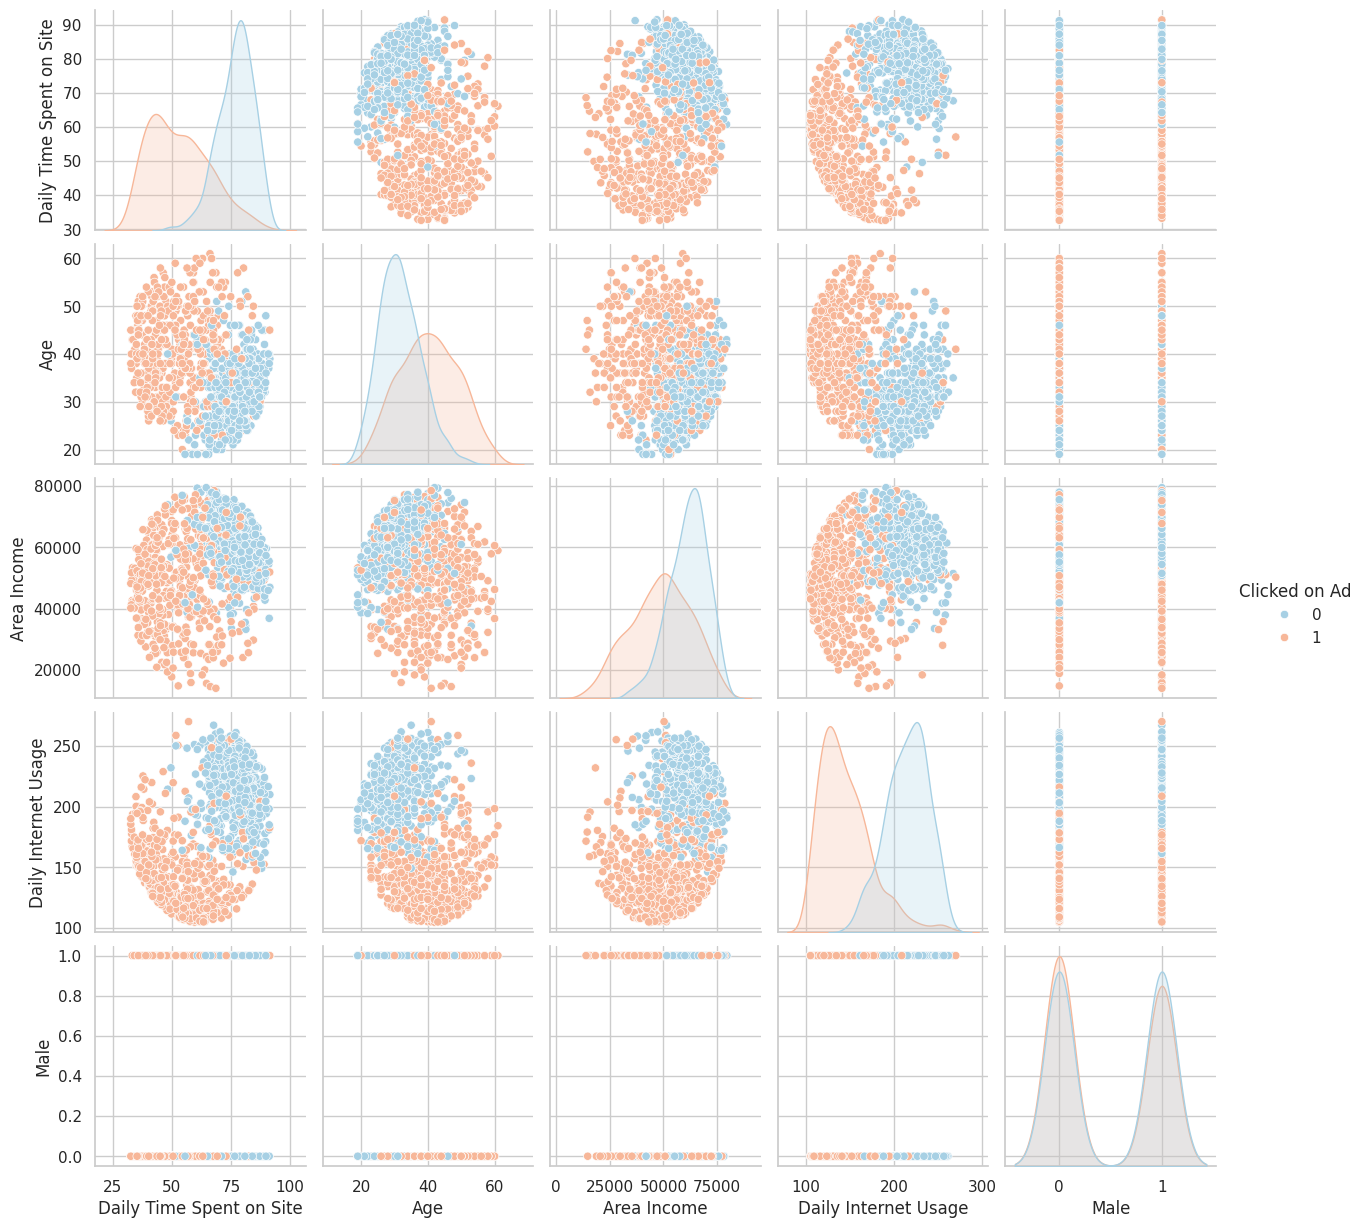

In [ ]:
# A pairplot with the hue defined by the 'Click on Ad' column featuree
sns.pairplot(df, hue='Clicked on Ad', palette='RdBu_r')

<Axes: xlabel='Clicked on Ad', ylabel='count'>

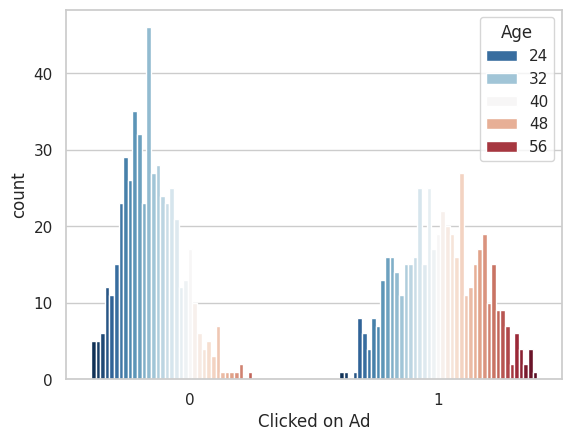

In [ ]:
# How did 'Age' play a role in Clicking the Ad?
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad', hue='Age', data=df, palette='RdBu_r')

<Axes: xlabel='Clicked on Ad', ylabel='count'>

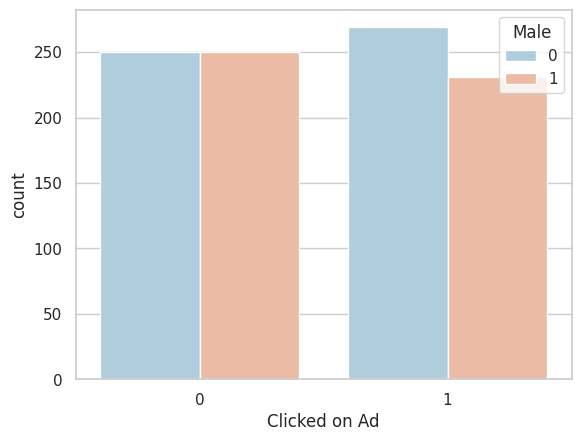

In [ ]:
# How did 'Male' play a role in Clicking the Ad?
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad', hue='Male', data=df, palette='RdBu_r')

##Find Missing Values

#Task 5: Perform Data Cleaning

In [ ]:
# Looking for Missing Values. The result of running the code shows no Missing Values in the dataset.
df.isnull()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


#Task 6: Visualize Cleaned up Dataset

#Task 7: Conceptualize the problem

#Task 8: Perform Data-Split

In [ ]:
# In order for our logistic model to work, we have to drop non-nedeed columns
df.drop(['Ad Topic Line','City','Country','Timestamp'], axis=1, inplace=True)

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Clicked on Ad', axis=1), df['Clicked on Ad'], test_size=0.3, random_state=42)

#Task 9: Choose the ML Method to follow

In [ ]:
from sklearn.linear_model import LogisticRegression

#Task 10: Train the ML Model

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

#Task 11: Test the Model

In [ ]:
predictions = logmodel.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [ ]:
print('The Prediction Acuracy of the model is', logmodel.score(x_test, y_test))
pp = logmodel.predict(x_test)
print("Click on Ad", sum(pp!=0))
print("No Click on Ad", sum(pp==0))

The Prediction Acuracy of the model is 0.8966666666666666
Click on Ad 135
No Click on Ad 165
